In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns

# Preprocessing

In [2]:
rawDf = pd.read_csv("MTG-OTJ-draft-card-ratings-2024-05-25.csv")

rawDf.head(5)

,Name,Color,Rarity,# Seen,ALSA,# Picked,ATA,# GP,% GP,GP WR,# OH,OH WR,# GD,GD WR,# GIH,GIH WR,# GNS,GNS WR,IWD
0,Another Round,W,R,64972,6.27,7953,9.59,1690,3.6%,46.6%,259,NaN,402,NaN,661,40.4%,1029,50.6%,-10.2pp
1,Archangel of Tithes,W,M,9905,2.08,3697,2.15,18171,82.7%,53.9%,2952,54.6%,4325,55.8%,7277,55.3%,10927,52.9%,2.4pp
2,Armored Armadillo,W,C,378941,7.89,40803,11.61,31423,12.9%,51.0%,5421,50.0%,7265,50.8%,12686,50.4%,18704,51.3%,-0.9pp
3,Aven Interrupter,W,R,24080,2.42,8609,2.64,44852,86.6%,55.5%,7735,56.6%,10692,57.5%,18427,57.1%,26391,54.3%,2.8pp
4,Bounding Felidar,W,U,98493,4.11,18079,5.53,86683,80.2%,54.6%,13034,53.6%,20093,55.4%,33127,54.7%,52462,54.4%,0.3pp


In [3]:
rawDf.isna().sum()

Name         0
Color       46
Rarity       0
# Seen       0
ALSA         0
# Picked     0
ATA          1
# GP         0
% GP         0
GP WR        8
# OH         0
OH WR       31
# GD         0
GD WR       23
# GIH        0
GIH WR      16
# GNS        0
GNS WR      12
IWD         16
dtype: int64

In [4]:
rawDf["Color"] = rawDf['Color'].fillna("C")

In [5]:
single_colors = {"R", "U", "G", "W", "B", "C"}

rawDf["Color"] = rawDf["Color"].apply(
    lambda x: x if x in single_colors else "Multi"
)

In [6]:
rawDf["Color"].unique()

array(['W', 'U', 'B', 'R', 'G', 'Multi', 'C'], dtype=object)

In [7]:
print(rawDf.shape)
cleanDF = rawDf.dropna()
print(cleanDF.shape)

(376, 19)
(345, 19)


In [8]:
rarityGroup = cleanDF.groupby("Rarity")

rarityGroup.size()

Rarity
C     91
M     55
R     79
U    120
dtype: int64

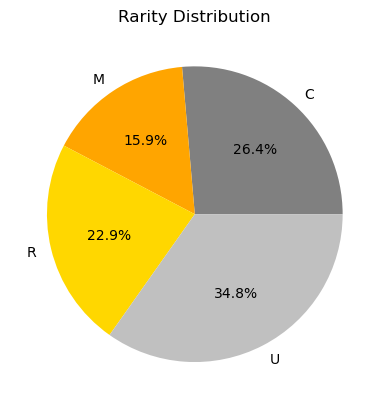

In [9]:
lapels = rarityGroup.size().index

plt.pie(x = rarityGroup.size(),
        labels= lapels,
        autopct = '%1.1f%%', 
        colors = ["Grey", "Orange", "Gold", "Silver"])
plt.title("Rarity Distribution")

plt.show()

In [10]:
cleanDF["GP WR"] = (
    cleanDF["GP WR"]
        .str.replace("%", "", regex=False)
        .astype(float)
)

/var/folders/cw/bm00nntd1rq6d8jqlstnxbv00000gn/T/ipykernel_12504/2039420234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["GP WR"] = (


In [11]:
cleanDF["OH WR"] = (
    cleanDF["OH WR"]
        .str.replace("%", "", regex=False)
        .astype(float)
)

/var/folders/cw/bm00nntd1rq6d8jqlstnxbv00000gn/T/ipykernel_12504/932205650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["OH WR"] = (


In [12]:
cleanDF["GD WR"] = (
    cleanDF["GD WR"]
        .str.replace("%", "", regex=False)
        .astype(float)
)

/var/folders/cw/bm00nntd1rq6d8jqlstnxbv00000gn/T/ipykernel_12504/1488369617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["GD WR"] = (


# Win rates by rarity

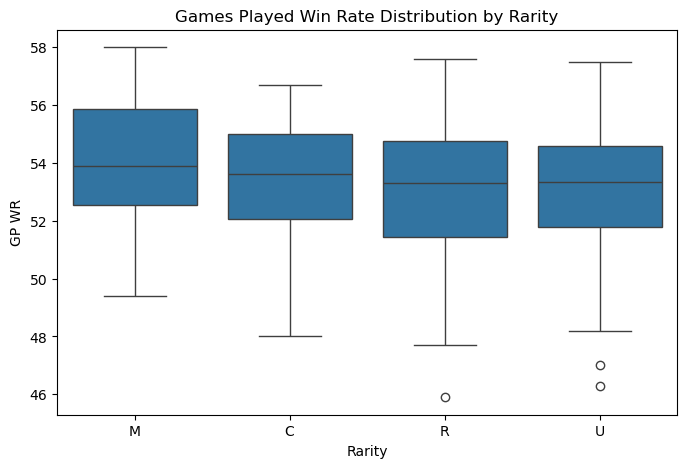

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Rarity", y="GP WR", data=cleanDF)
plt.title("Games Played Win Rate Distribution by Rarity")
plt.show()

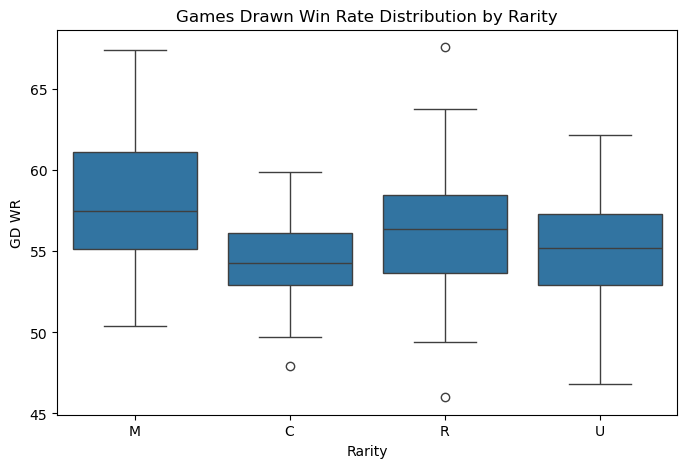

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Rarity", y="GD WR", data=cleanDF)
plt.title("Games Drawn Win Rate Distribution by Rarity")
plt.show()

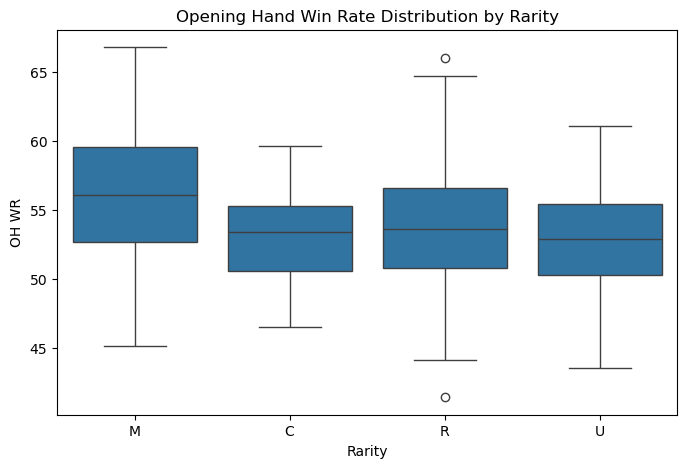

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Rarity", y="OH WR", data=cleanDF)
plt.title("Opening Hand Win Rate Distribution by Rarity")
plt.show()

In [16]:
cleanDF["IWD"] = (
    cleanDF["IWD"]
        .str.replace("%", "", regex=False) 
        .str.replace("pp", "", regex=False)
        .str.strip() 
)
cleanDF["IWD"] = pd.to_numeric(cleanDF["IWD"], errors="coerce")

/var/folders/cw/bm00nntd1rq6d8jqlstnxbv00000gn/T/ipykernel_12504/2276898117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["IWD"] = (
/var/folders/cw/bm00nntd1rq6d8jqlstnxbv00000gn/T/ipykernel_12504/2276898117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF["IWD"] = pd.to_numeric(cleanDF["IWD"], errors="coerce")


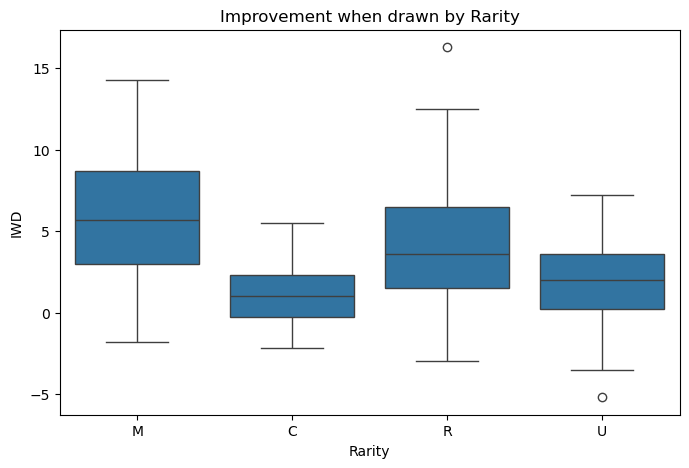

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Rarity", y="IWD", data=cleanDF)
plt.title("Improvement when drawn by Rarity")
plt.show()

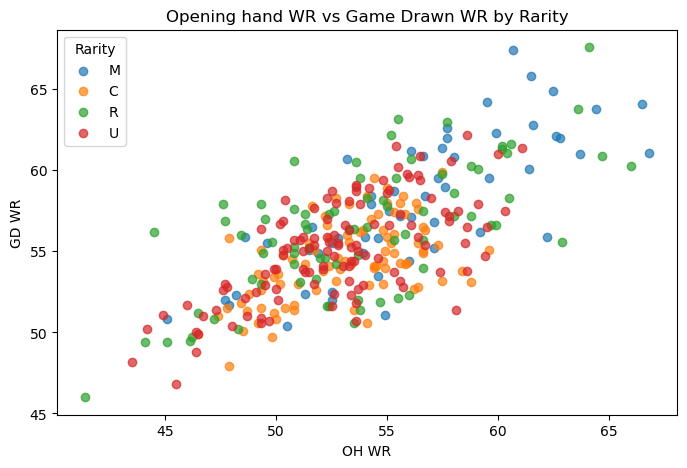

In [18]:
plt.figure(figsize=(8,5))

rarities = cleanDF["Rarity"].unique() 
colors = plt.cm.tab10.colors

for i, rarity in enumerate(rarities):
    subset = cleanDF[cleanDF["Rarity"] == rarity]
    plt.scatter(
        subset["OH WR"], 
        subset["GD WR"], 
        color=colors[i % len(colors)], 
        label=rarity,
        alpha=0.7
    )

plt.title("Opening hand WR vs Game Drawn WR by Rarity")
plt.xlabel("OH WR")
plt.ylabel("GD WR")
plt.legend(title="Rarity")
plt.show()

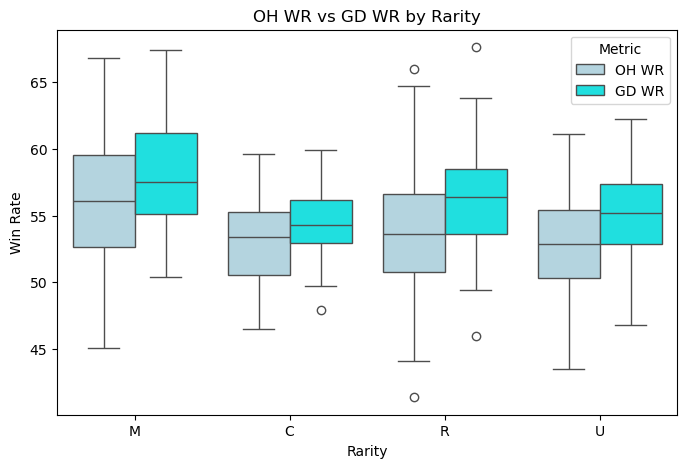

In [19]:

plt.figure(figsize=(8,5))

melted = cleanDF.melt(
    id_vars="Rarity", 
    value_vars=["OH WR", "GD WR"], 
    var_name="Metric", 
    value_name="Win Rate"
)

sns.boxplot(
    x="Rarity", 
    y="Win Rate", 
    hue="Metric",
    data=melted,
    palette=["lightblue", "cyan"]
)

plt.title("OH WR vs GD WR by Rarity")
plt.show()

# Win rates by Color

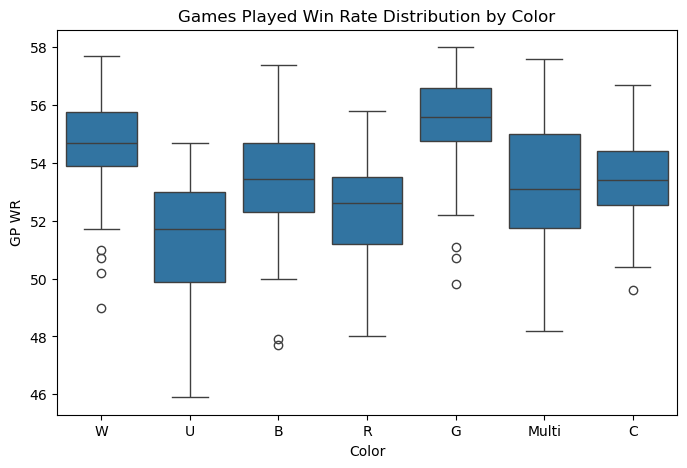

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Color", y="GP WR", data=cleanDF)
plt.title("Games Played Win Rate Distribution by Color")
plt.show()

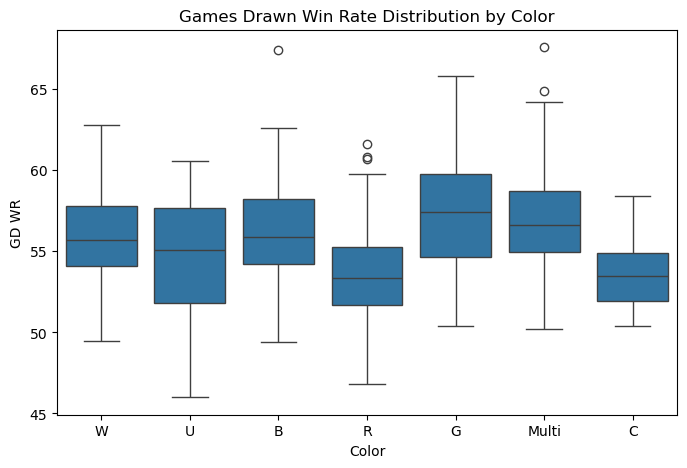

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Color", y="GD WR", data=cleanDF)
plt.title("Games Drawn Win Rate Distribution by Color")
plt.show()

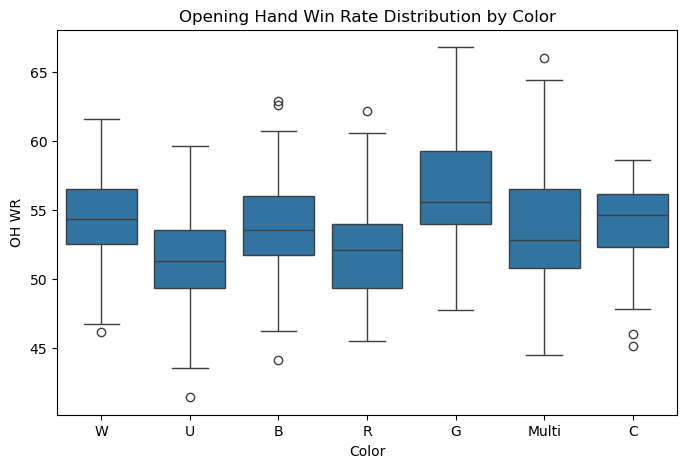

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Color", y="OH WR", data=cleanDF)
plt.title("Opening Hand Win Rate Distribution by Color")
plt.show()

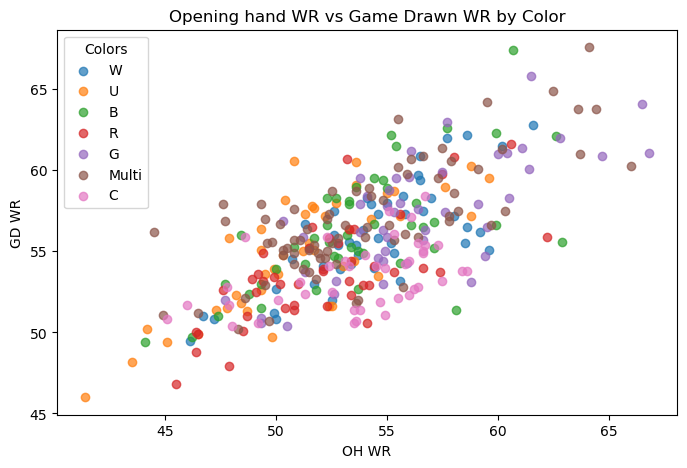

In [24]:
plt.figure(figsize=(8,5))

colorities = cleanDF["Color"].unique() 
colors = plt.cm.tab10.colors

for i, rarity in enumerate(colorities):
    subset = cleanDF[cleanDF["Color"] == rarity]
    plt.scatter(
        subset["OH WR"], 
        subset["GD WR"], 
        color=colors[i % len(colors)], 
        label=rarity,
        alpha=0.7
    )

plt.title("Opening hand WR vs Game Drawn WR by Color")
plt.xlabel("OH WR")
plt.ylabel("GD WR")
plt.legend(title="Colors")
plt.show()

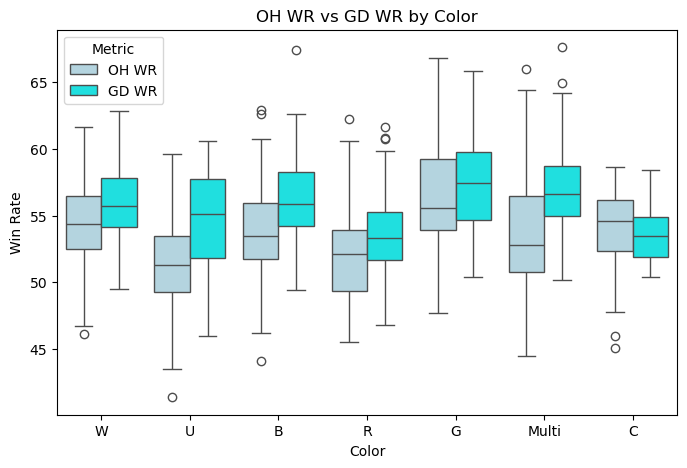

In [25]:

plt.figure(figsize=(8,5))

melted = cleanDF.melt(
    id_vars="Color", 
    value_vars=["OH WR", "GD WR"], 
    var_name="Metric", 
    value_name="Win Rate"
)

sns.boxplot(
    x="Color", 
    y="Win Rate", 
    hue="Metric",
    data=melted,
    palette=["lightblue", "cyan"]
)

plt.title("OH WR vs GD WR by Color")
plt.show()